In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
crimes_df = pd.read_csv('Crimes_-_2020_to_Present.csv')
crimes_df.head(10)

,ID,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Year,Updated On,Latitude,Longitude
0,12014684,JD189901,3/17/2020 21:30,THEFT,$500 AND UNDER,STREET,False,False,16,45,2020,3/25/2020 15:45,41.952052,-87.754660
1,12571973,JE482457,12/19/2021 7:23,BATTERY,SIMPLE,SIDEWALK,True,True,9,15,2021,9/12/2022 16:45,41.816657,-87.695689
2,12012127,JD189186,3/18/2020 2:03,MOTOR VEHICLE THEFT,AUTOMOBILE,APARTMENT,False,True,11,28,2020,3/25/2020 15:47,41.877110,-87.723990
3,12012330,JD189367,3/18/2020 8:50,ASSAULT,SIMPLE,RESIDENCE,False,False,25,35,2020,3/25/2020 15:47,41.923369,-87.731634
4,12014760,JD192130,3/18/2020 13:00,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,OTHER (SPECIFY),False,False,11,28,2020,3/25/2020 15:47,41.879264,-87.743971
5,12012667,JD189808,3/18/2020 17:35,NARCOTICS,MANUFACTURE / DELIVER - CRACK,SIDEWALK,True,False,15,28,2020,3/25/2020 15:47,41.876128,-87.745112
6,12015216,JD192637,3/16/2020 0:05,THEFT,$500 AND UNDER,STREET,False,False,2,3,2020,3/25/2020 15:45,41.804781,-87.618038
7,12016052,JD193500,3/18/2020 23:15,CRIMINAL DAMAGE,TO VEHICLE,RESIDENCE,False,False,19,43,2020,3/25/2020 15:47,NaN,NaN
8,12012728,JD189837,3/18/2020 18:00,ROBBERY,ARMED - HANDGUN,STREET,False,False,10,24,2020,3/25/2020 15:47,41.860148,-87.712804
9,12012604,JD189554,3/18/2020 14:04,BATTERY,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SE...",RESIDENCE,False,True,4,7,2020,3/25/2020 15:47,41.707542,-87.565714


In [8]:
crimes_df.dtypes

ID                        int64
Case Number              object
Date                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
District                  int64
Ward                      int64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
dtype: object

In [3]:
crimes_df.shape

(10219, 14)

In [4]:
crimes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10219 entries, 0 to 10218
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    10219 non-null  int64  
 1   Case Number           10219 non-null  object 
 2   Date                  10219 non-null  object 
 3   Primary Type          10219 non-null  object 
 4   Description           10219 non-null  object 
 5   Location Description  10171 non-null  object 
 6   Arrest                10219 non-null  bool   
 7   Domestic              10219 non-null  bool   
 8   District              10219 non-null  int64  
 9   Ward                  10219 non-null  int64  
 10  Year                  10219 non-null  int64  
 11  Updated On            10219 non-null  object 
 12  Latitude              10121 non-null  float64
 13  Longitude             10121 non-null  float64
dtypes: bool(2), float64(2), int64(4), object(6)
memory usage: 978.1+ KB


In [5]:
crimes_df_clean = crimes_df.dropna(how='any')
crimes_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10080 entries, 0 to 10218
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    10080 non-null  int64  
 1   Case Number           10080 non-null  object 
 2   Date                  10080 non-null  object 
 3   Primary Type          10080 non-null  object 
 4   Description           10080 non-null  object 
 5   Location Description  10080 non-null  object 
 6   Arrest                10080 non-null  bool   
 7   Domestic              10080 non-null  bool   
 8   District              10080 non-null  int64  
 9   Ward                  10080 non-null  int64  
 10  Year                  10080 non-null  int64  
 11  Updated On            10080 non-null  object 
 12  Latitude              10080 non-null  float64
 13  Longitude             10080 non-null  float64
dtypes: bool(2), float64(2), int64(4), object(6)
memory usage: 1.0+ MB


In [6]:
crimes_df_clean.shape

(10080, 14)

In [7]:
#What is the comparison between domestic vs nondomestic infractions?

grouped = crimes_df.groupby(['domestic']).size().reset_index(name='true')

pivot = grouped.pivot(index='type', columns='infraction', values='counts')
pivot.plot(kind='pie', subplots=True, figsize=(8, 4), autopct='%1.1f%%')

plt.title('Infractions by Type')

plt.show()


KeyError: 'domestic'

In [ ]:
crimes_df["Domestic"].value_counts()

False    8009
True     2210
Name: Domestic, dtype: int64

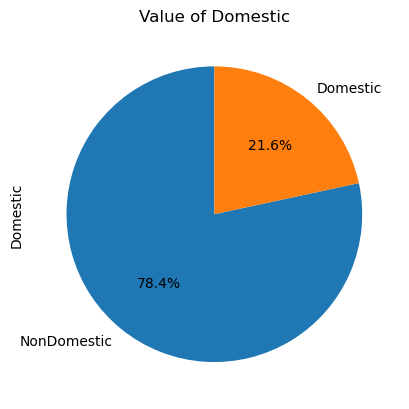

In [ ]:
Domestic = crimes_df["Domestic"].value_counts()

Domestic.plot(kind='pie', labels=["NonDomestic", "Domestic"], autopct='%1.1f%%', startangle=90)
plt.title('Value of Domestic')

plt.show()

In [ ]:
crimes_df["District"].value_counts()

11    733
6     697
4     622
8     616
25    584
7     530
18    516
5     504
3     490
12    484
10    460
9     459
2     446
1     444
15    433
19    419
22    347
16    341
14    318
24    305
17    288
20    183
Name: District, dtype: int64

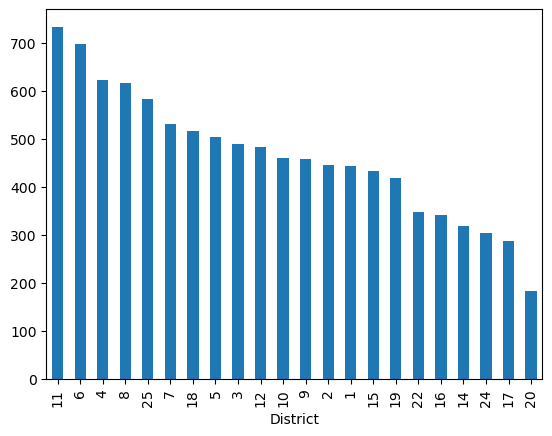

In [ ]:
Crime_byDistrict = crimes_df.groupby(["District"]).count()['Arrest']
Crime_byDistrict.sort_values(ascending=False).plot(kind='bar')
plt.show()

In [ ]:
#Chart the percentage of charges that lead to arrests. 
crimes_df["Arrest"].value_counts()

False    8911
True     1308
Name: Arrest, dtype: int64

In [31]:
crimes_df['Date'] = pd.to_datetime(crimes_df['Date'])


In [16]:
crimes_df.head()

,ID,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Year,Updated On,Latitude,Longitude
0,12014684,JD189901,2020-03-17 21:30:00,THEFT,$500 AND UNDER,STREET,False,False,16,45,2020,3/25/2020 15:45,41.952052,-87.754660
1,12571973,JE482457,2021-12-19 07:23:00,BATTERY,SIMPLE,SIDEWALK,True,True,9,15,2021,9/12/2022 16:45,41.816657,-87.695689
2,12012127,JD189186,2020-03-18 02:03:00,MOTOR VEHICLE THEFT,AUTOMOBILE,APARTMENT,False,True,11,28,2020,3/25/2020 15:47,41.877110,-87.723990
3,12012330,JD189367,2020-03-18 08:50:00,ASSAULT,SIMPLE,RESIDENCE,False,False,25,35,2020,3/25/2020 15:47,41.923369,-87.731634
4,12014760,JD192130,2020-03-18 13:00:00,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,OTHER (SPECIFY),False,False,11,28,2020,3/25/2020 15:47,41.879264,-87.743971


In [32]:
#Calculate arrests per month. Do arrest increase during the holidays? Holidays: October - January. 
#Convert date to date/time 

import numpy as np 
import datetime
#crimes_df['Winter Holidays'] = crimes_df.loc[datetime.date(year=2020, month=1, day=1):datetime.date(year=2020, month=1, day=1)]
crimes_df['Winter Holidays'] = crimes_df[ crimes_df['Date'].datetime.strftime('%Y-%m-%d') == "2020-01-01"]
#[crimes_df['Date'] > datetime.datetime(2020, 1, 1, 12,0,0)]


AttributeError: 'Series' object has no attribute 'datetime'

In [ ]:
#Calculate crimes per district. Compare increases throughout the year. 

In [ ]:
crimes_df["Year"].value_counts()-

2020    8046
2021    1519
2023     610
2022      44
Name: Year, dtype: int64